https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0#/media/File:Iris_dataset_scatterplot.svg

In [1]:
%pylab inline
import sklearn.datasets
import torch
import torch.nn

random.seed(0)
torch.manual_seed(0)

Populating the interactive namespace from numpy and matplotlib


In [2]:
iris = sklearn.datasets.load_iris()
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [3]:
features = iris.data[:, :2]
labels = iris.target

order = random.permutation(150)

features = features[order, :]
labels = labels[order]

targets = numpy.zeros([150, 3])
targets[arange(150), labels] = 1.0

train_features = features[:100, :]
test_features = features[100:, :]
train_targets = targets[:100]
test_targets = targets[100:]
train_labels = labels[:100]
test_labels = labels[100:]

In [4]:
labels

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0,
       0, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 0, 2, 1, 1, 1,
       1, 2, 0, 0, 2, 1, 0, 0, 1, 0, 2, 1, 0, 1, 2, 1, 0, 2, 2, 2, 2, 0,
       0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 1, 2, 2, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 2, 1, 2, 1, 0, 2, 0, 2, 0, 0, 2, 0, 2, 1, 1, 1, 2, 2,
       1, 1, 0, 1, 2, 2, 0, 1, 1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

In [5]:
class IrisNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        
        super(IrisNet, self).__init__()
        self.fc1 = torch.nn.Linear(2, n_hidden_neurons)
        self.activ1 = torch.nn.Tanh()
        self.activ2 = torch.nn.Tanh()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 3)
        self.sm = torch.nn.Softmax(dim=1)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.activ1(x)
        x = self.activ2(x)
        x = self.fc2(x)
#         x = self.sm(x) 
        return x

    def inference(self, x):
        x = self.forward(x)
        x = self.sm(x)
        return x

In [6]:
criterion = torch.nn.CrossEntropyLoss()
    
print(train_targets.shape)

iris_net = IrisNet(5)

optimizer = torch.optim.Adam(iris_net.parameters(), 
                             lr=1.0e-3)

(100, 3)


In [7]:
batch_size = 10

softmax = torch.nn.Softmax()

for epoch in range(10000):
    order = random.permutation(train_features.shape[0])
    for start_index in range(0, train_features.shape[0], batch_size):
        optimizer.zero_grad()
        
        batch_indice = order[start_index:start_index+batch_size]
        
        batch_features = torch.FloatTensor(train_features[batch_indice, :])
        batch_labels = torch.LongTensor(train_labels[batch_indice])
        
        features_var = torch.autograd.Variable(batch_features)
        targets_var = torch.autograd.Variable(batch_labels)
        
        preds_var = iris_net.forward(features_var) 
        
        loss = criterion(preds_var, targets_var)
        loss.backward()
        
        optimizer.step()
        
    test_features = torch.Tensor(test_features)
    features_var = torch.autograd.Variable(test_features)
    test_preds = iris_net.forward(features_var)
    test_preds = softmax(test_preds).data.numpy()
        
    test_preds = test_preds.argmax(axis=1)
    if epoch % 100 == 0:
        print((test_preds == test_labels).sum() / float(test_labels.size))

0.34


/home/teacher/.local/lib/python3.5/site-packages/ipykernel_launcher.py:28: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


0.68
0.68
0.7
0.7
0.7
0.7
0.7
0.7
0.74
0.78
0.78
0.8
0.8
0.8
0.8
0.8
0.8
0.8
0.8
0.8
0.82
0.82
0.82
0.82
0.82
0.82
0.82
0.82
0.82
0.82
0.82
0.82
0.82
0.82
0.82
0.82
0.82
0.82
0.82
0.82
0.82
0.82
0.82
0.82
0.82
0.82
0.82
0.82
0.82
0.82
0.82
0.82
0.82
0.82
0.82
0.82
0.82
0.82
0.82
0.82
0.82
0.82
0.82
0.82
0.82
0.82
0.82
0.82
0.82
0.82
0.82
0.82
0.82
0.82
0.82
0.82
0.82
0.82
0.82
0.82
0.82
0.82
0.82
0.82
0.82
0.82
0.82
0.82
0.82
0.82
0.82
0.82
0.82
0.82
0.82
0.82
0.82
0.82
0.82


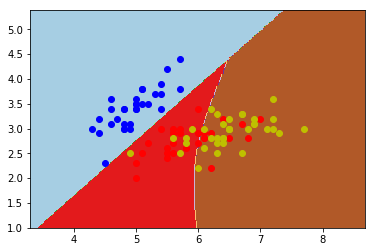

In [8]:
n_classes = 3
plot_colors = "bry"
plot_step = 0.02

X = train_features
x_var = torch.autograd.Variable(torch.Tensor(X))
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1


xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))


Z = iris_net.inference(torch.autograd.Variable(
    torch.Tensor(np.c_[xx.ravel(), yy.ravel()]))).data.numpy().argmax(axis=1)
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(train_labels == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                cmap=plt.cm.Paired)

# Задание 1
Сделать нейронную сеть с двумя скрытыми слоями (оба сигмоидные). Подобрать количество нейронов в первом и втором слое, которое максимизирует значение accuracy (процент угаданных цветков).

Замените функцию активации с сигмоиды на гиперболический тангенс.
Что изменилось?

In [9]:
class MyNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        
        super(MyNet, self).__init__()
        self.fc1 = torch.nn.Linear(2, n_hidden_neurons)
        self.activ1 = torch.nn.Tanh()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
        self.activ2 = torch.nn.Tanh()
        self.fc3 = torch.nn.Linear(n_hidden_neurons, 3)
        self.sm = torch.nn.Softmax(dim=1)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.activ1(x)
        x = self.fc2(x)
        x = self.activ2(x)
        x = self.fc3(x)
#         x = self.sm(x) 
        return x

    def inference(self, x):
        x = self.forward(x)
        x = self.sm(x)
        return x

In [10]:
criterion = torch.nn.CrossEntropyLoss()
    
print(train_targets.shape)

iris_net = MyNet(50)

optimizer = torch.optim.Adam(iris_net.parameters(), 
                             lr=1.0e-3)

(100, 3)


In [11]:
batch_size = 20

softmax = torch.nn.Softmax()

for epoch in range(5000):
    order = random.permutation(train_features.shape[0])
    for start_index in range(0, train_features.shape[0], batch_size):
        optimizer.zero_grad()
        
        batch_indice = order[start_index:start_index+batch_size]
        
        batch_features = torch.FloatTensor(train_features[batch_indice, :])
        batch_labels = torch.LongTensor(train_labels[batch_indice])
        
        features_var = torch.autograd.Variable(batch_features)
        targets_var = torch.autograd.Variable(batch_labels)
        
        preds_var = iris_net.forward(features_var) 
        
        loss = criterion(preds_var, targets_var)
        loss.backward()
        
        optimizer.step()
        
    test_features = torch.Tensor(test_features)
    features_var = torch.autograd.Variable(test_features)
    test_preds = iris_net.forward(features_var)
    test_preds = softmax(test_preds).data.numpy()
        
    test_preds = test_preds.argmax(axis=1)
    if epoch % 100 == 0:
        print((test_preds == test_labels).sum() / float(test_labels.size))

0.28


/home/teacher/.local/lib/python3.5/site-packages/ipykernel_launcher.py:28: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


0.72
0.8
0.82
0.82
0.82
0.8
0.82
0.82
0.8
0.8
0.8
0.8
0.8
0.8
0.8
0.82
0.82
0.8
0.8
0.82
0.82
0.8
0.8
0.82
0.8
0.78
0.8
0.8
0.8
0.8
0.8
0.8
0.8
0.78
0.8
0.8
0.8
0.8
0.8
0.8
0.82
0.82
0.8
0.8
0.8
0.8
0.8
0.8
0.8


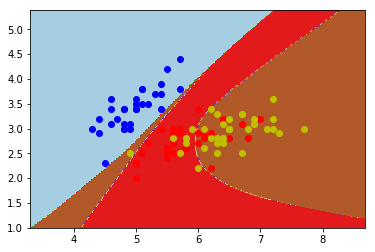

In [12]:
n_classes = 3
plot_colors = "bry"
plot_step = 0.02

X = train_features
x_var = torch.autograd.Variable(torch.Tensor(X))
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1


xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))


Z = iris_net.inference(torch.autograd.Variable(
    torch.Tensor(np.c_[xx.ravel(), yy.ravel()]))).data.numpy().argmax(axis=1)
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(train_labels == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                cmap=plt.cm.Paired)

# Задание 2
Отцентрируйте и отнормируйте данные, добавьте неиспользованные признаки. Стало ли качество лучше? Что больше повлияло на качество, предобработка данных или увеличение числа рассматриваемых признаков?

In [13]:
features = sklearn.preprocessing.scale(iris.data)
labels = iris.target

order = random.permutation(150)

features = features[order, :]
labels = labels[order]

targets = numpy.zeros([150, 3])
targets[arange(150), labels] = 1.0

train_features = features[:100, :]
test_features = features[100:, :]
train_targets = targets[:100]
test_targets = targets[100:]
train_labels = labels[:100]
test_labels = labels[100:]

In [14]:
class MyNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        
        super(MyNet, self).__init__()
        self.fc1 = torch.nn.Linear(4, n_hidden_neurons)
        self.activ1 = torch.nn.Tanh()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
        self.activ2 = torch.nn.Tanh()
        self.fc3 = torch.nn.Linear(n_hidden_neurons, 3)
        self.sm = torch.nn.Softmax(dim=1)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.activ1(x)
        x = self.fc2(x)
        x = self.activ2(x)
        x = self.fc3(x)
#         x = self.sm(x) 
        return x

    def inference(self, x):
        x = self.forward(x)
        x = self.sm(x)
        return x

In [15]:
criterion = torch.nn.CrossEntropyLoss()
    
print(train_targets.shape)

iris_net = MyNet(50)

optimizer = torch.optim.Adam(iris_net.parameters(), 
                             lr=1.0e-3)

(100, 3)


In [16]:
batch_size = 20

softmax = torch.nn.Softmax()

for epoch in range(5000):
    order = random.permutation(train_features.shape[0])
    for start_index in range(0, train_features.shape[0], batch_size):
        optimizer.zero_grad()
        
        batch_indice = order[start_index:start_index+batch_size]
        
        batch_features = torch.FloatTensor(train_features[batch_indice, :])
        batch_labels = torch.LongTensor(train_labels[batch_indice])
        
        features_var = torch.autograd.Variable(batch_features)
        targets_var = torch.autograd.Variable(batch_labels)
        
        preds_var = iris_net.forward(features_var) 
        
        loss = criterion(preds_var, targets_var)
        loss.backward()
        
        optimizer.step()
        
    test_features = torch.Tensor(test_features)
    features_var = torch.autograd.Variable(test_features)
    test_preds = iris_net.forward(features_var)
    test_preds = softmax(test_preds).data.numpy()
        
    test_preds = test_preds.argmax(axis=1)
    if epoch % 100 == 0:
        print((test_preds == test_labels).sum() / float(test_labels.size))

0.62


/home/teacher/.local/lib/python3.5/site-packages/ipykernel_launcher.py:28: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


0.98
0.98
0.98
0.98
0.98
0.98
0.98
0.98
0.98
0.98
0.98
0.98
0.98
0.98
0.98
0.98
0.98
0.98
0.98
0.98
0.98
0.98
0.98
0.98
0.98
0.98
0.98
0.98
0.98
0.98
0.98
0.98
0.98
0.98
0.98
0.98
0.98
0.98
0.98
0.98
0.98
0.98
0.98
0.98
0.98
0.98
0.98
0.98
0.98


In [27]:
# np.c_[xx.ravel(), yy.ravel()].shape

(120582, 2)

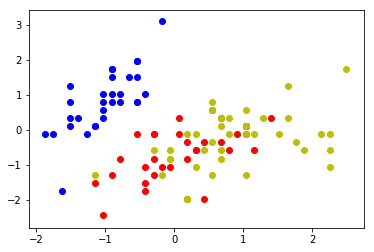

In [28]:
n_classes = 3
plot_colors = "bry"
plot_step = 0.02

X = train_features
x_var = torch.autograd.Variable(torch.Tensor(X))


# xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
#                      np.arange(y_min, y_max, plot_step))


# Z = iris_net.inference(torch.autograd.Variable(
#     torch.Tensor(np.c_[xx.ravel(), yy.ravel()]))).data.numpy().argmax(axis=1)
# Z = Z.reshape(xx.shape)
# cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(train_labels == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                cmap=plt.cm.Paired)